In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Time%20Series%20Analysis/Time%20Series%20-%20Day%204/MSFT_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


In [ ]:
data['date'] = pd.to_datetime(data['date'])
data.columns = ['Date', 'Open', 'High', 'Low', 'Observed', 'Volume', 'Ticker']
data = data[['Date', 'Observed']]

In [ ]:
data.head()

,Date,Observed
0,2013-02-08,27.55
1,2013-02-11,27.86
2,2013-02-12,27.88
3,2013-02-13,28.03
4,2013-02-14,28.04


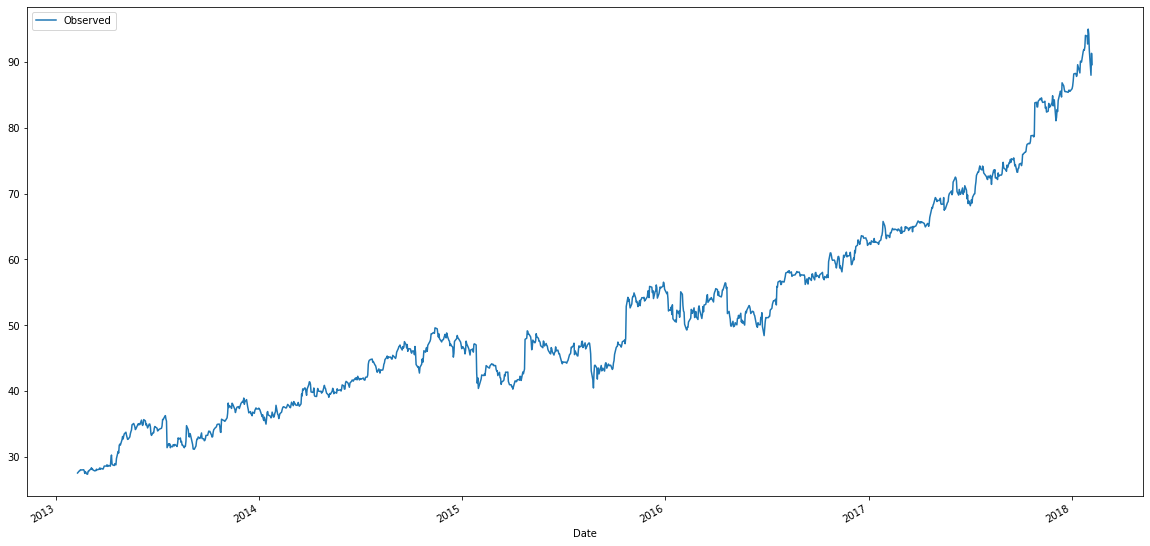

In [ ]:
data.plot(x='Date', y='Observed', figsize=(20,10))

In [ ]:
history = 7
future = 7

# create our window to shift our data
shifts = [x + future for x in range(1, history+1)]
shifts

[8, 9, 10, 11, 12, 13, 14]

In [ ]:
# feature engineering
for shift in shifts:
  data[f't-{shift}'] = data['Observed'].shift(shift)

data.head()

,Date,Observed,t-8,t-9,t-10,t-11,t-12,t-13,t-14
0,2013-02-08,27.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-02-11,27.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-02-12,27.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-02-13,28.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-02-14,28.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.dropna(inplace=True)
data.head()

,Date,Observed,t-8,t-9,t-10,t-11,t-12,t-13,t-14
14,2013-03-01,27.95,28.045,28.010,28.040,28.030,27.880,27.86,27.55
15,2013-03-04,28.15,27.870,28.045,28.010,28.040,28.030,27.88,27.86
16,2013-03-05,28.35,27.490,27.870,28.045,28.010,28.040,28.03,27.88
17,2013-03-06,28.09,27.760,27.490,27.870,28.045,28.010,28.04,28.03
18,2013-03-07,28.14,27.370,27.760,27.490,27.870,28.045,28.01,28.04


In [ ]:
from sklearn.model_selection import train_test_split

data.set_index('Date', inplace=True)
X = data.drop(columns=['Observed'])
y = data['Observed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
X_train.tail()

,t-8,t-9,t-10,t-11,t-12,t-13,t-14
Date,,,,,,,
2017-02-06,63.68,63.52,62.96,62.74,62.30,62.50,62.53
2017-02-07,64.27,63.68,63.52,62.96,62.74,62.30,62.50
2017-02-08,65.78,64.27,63.68,63.52,62.96,62.74,62.30
2017-02-09,65.13,65.78,64.27,63.68,63.52,62.96,62.74
2017-02-10,64.65,65.13,65.78,64.27,63.68,63.52,62.96


In [ ]:
X_test.head()

,t-8,t-9,t-10,t-11,t-12,t-13,t-14
Date,,,,,,,
2017-02-13,63.58,64.65,65.13,65.78,64.27,63.68,63.52
2017-02-14,63.17,63.58,64.65,65.13,65.78,64.27,63.68
2017-02-15,63.68,63.17,63.58,64.65,65.13,65.78,64.27
2017-02-16,63.64,63.68,63.17,63.58,64.65,65.13,65.78
2017-02-17,63.43,63.64,63.68,63.17,63.58,64.65,65.13


In [ ]:
# keep last 30 data points for OOS (out-of-sample)
# X_train = X.iloc[:-30]
# X_test = X.iloc[-30:]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print('R-Squared: ', r2_score(y_test, predictions))
print('Mean Absolute Error', mean_absolute_error(y_test, predictions))
print('Root Mean Squared Error', np.sqrt(mean_squared_error(y_test, predictions)))

R-Squared:  -1.952524466710329
Mean Absolute Error 11.531936546184774
Root Mean Squared Error 14.155863363183087


In [ ]:
X_train.head()

,t-8,t-9,t-10,t-11,t-12,t-13,t-14
Date,,,,,,,
2013-03-01,28.045,28.010,28.040,28.030,27.880,27.86,27.55
2013-03-04,27.870,28.045,28.010,28.040,28.030,27.88,27.86
2013-03-05,27.490,27.870,28.045,28.010,28.040,28.03,27.88
2013-03-06,27.760,27.490,27.870,28.045,28.010,28.04,28.03
2013-03-07,27.370,27.760,27.490,27.870,28.045,28.01,28.04


In [ ]:
X_test.head()

,t-8,t-9,t-10,t-11,t-12,t-13,t-14
Date,,,,,,,
2017-02-13,63.58,64.65,65.13,65.78,64.27,63.68,63.52
2017-02-14,63.17,63.58,64.65,65.13,65.78,64.27,63.68
2017-02-15,63.68,63.17,63.58,64.65,65.13,65.78,64.27
2017-02-16,63.64,63.68,63.17,63.58,64.65,65.13,65.78
2017-02-17,63.43,63.64,63.68,63.17,63.58,64.65,65.13


In [ ]:
def iscatter(df, x, y, color=None, size=None, title=''):
    fig = px.scatter(df, x=x, y=y, color=color, size=size, 
                     title=title, template='none')
    
    fig.update_traces(marker_line_color='black', 
                  marker_line_width=1)

    fig.show()
    
results = pd.DataFrame([list(y_test), predictions], index=['Observed', 'Predicted']).T
iscatter(results, 'Observed', 'Predicted', title='Observed vs. Predicted')


In [ ]:
# predicting multiple timesteps into future

history = 7
future = 5

shifted = data.copy()[['Observed']]
shifted.columns = ['t+0']

past_shifts = [x for x in range(1, history+1)]
future_shifts = [x for x in range(1, future)]

In [ ]:
past_shifts

[1, 2, 3, 4, 5, 6, 7]

In [ ]:
future_shifts

[1, 2, 3, 4]

In [ ]:
for shift in past_shifts:
  shifted[f't-{shift}'] = shifted['t+0'].shift(shift)

In [ ]:
for shift in future_shifts:
  shifted[f't+{shift}'] = shifted['t+0'].shift(-shift)

In [ ]:
shifted.dropna(inplace=True)
shifted.head()

,t+0,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t+1,t+2,t+3,t+4
Date,,,,,,,,,,,,
2013-03-12,27.910,27.870,28.000,28.140,28.09,28.35,28.15,27.95,27.915,28.135,28.035,28.100
2013-03-13,27.915,27.910,27.870,28.000,28.14,28.09,28.35,28.15,28.135,28.035,28.100,28.180
2013-03-14,28.135,27.915,27.910,27.870,28.00,28.14,28.09,28.35,28.035,28.100,28.180,28.315
2013-03-15,28.035,28.135,27.915,27.910,27.87,28.00,28.14,28.09,28.100,28.180,28.315,28.110
2013-03-18,28.100,28.035,28.135,27.915,27.91,27.87,28.00,28.14,28.180,28.315,28.110,28.250


In [ ]:
X = shifted[[f't-{shift}' for shift in past_shifts]]
X.head()

,t-1,t-2,t-3,t-4,t-5,t-6,t-7
Date,,,,,,,
2013-03-12,27.870,28.000,28.140,28.09,28.35,28.15,27.95
2013-03-13,27.910,27.870,28.000,28.14,28.09,28.35,28.15
2013-03-14,27.915,27.910,27.870,28.00,28.14,28.09,28.35
2013-03-15,28.135,27.915,27.910,27.87,28.00,28.14,28.09
2013-03-18,28.035,28.135,27.915,27.91,27.87,28.00,28.14


In [ ]:
future_shifts

[1, 2, 3, 4]

In [ ]:
future_shifts = [0] + future_shifts
future_shifts

[0, 1, 2, 3, 4]

In [ ]:
import pickle
models = []

for future_shift in future_shifts:
  # changing the target variable each iteration
  y = shifted[f't+{future_shift}']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

  # create model
  model = LinearRegression()
  model.fit(X_train, y_train)

  predictions = model.predict(X_test)
  print(f'R-Squared for t+{future_shift}:', r2_score(y_test, predictions))
  
  pickled = pickle.dump(model, open(f'model_{future_shift}.pkl', 'wb'))
  models.append(model)

R-Squared for t+0: 0.9911042454194476
R-Squared for t+1: 0.9831022341001843
R-Squared for t+2: 0.9739975644533416
R-Squared for t+3: 0.9663120440086372
R-Squared for t+4: 0.9556564643033606


In [ ]:
model_0 = pickle.load(open('model_0.pkl', 'rb'))
result = model_0.score(X_test, y_test)

In [ ]:
model_0.predict(X_test)

array([63.39530179, 64.06715685, 63.97453944, 64.71062684, 64.54922007,
       64.47732617, 64.46883318, 64.59284906, 64.458666  , 64.36310183,
       64.62274575, 64.61650663, 64.22074131, 63.98508919, 64.95166805,
       63.99663324, 64.2536695 , 64.29492741, 64.38549105, 64.97579839,
       64.74350785, 64.89397718, 64.68554997, 64.37605028, 64.73708309,
       64.65028326, 64.86632156, 64.9393687 , 64.19589264, 65.01964946,
       64.87015905, 64.95868242, 65.10389657, 65.28156045, 65.42386079,
       65.69467162, 65.82813216, 65.51198304, 65.6991538 , 65.53669403,
       65.71187807, 65.67777542, 65.52915622, 65.47119429, 65.23027695,
       64.94720227, 65.4996731 , 65.4023657 , 65.03813754, 65.51236735,
       66.39440741, 67.48797542, 67.87069208, 67.74271432, 68.15169856,
       68.34020581, 69.31525359, 69.2371108 , 69.01202813, 68.74286838,
       68.94921318, 68.89880735, 69.04337115, 69.31338775, 68.44019871,
       68.3595192 , 68.43657024, 69.41117243, 67.47019112, 67.73